# 1. Importing pandas

In [10]:
import pandas as pd
import numpy as np

# 2. Opening a local csv file

In [11]:
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [12]:
df.sample(n=5)

,Unnamed: 0,cgpa,iq,placement
2,2,5.3,121.0,0
5,5,7.1,48.0,1
65,65,8.1,166.0,1
62,62,6.0,102.0,0
0,0,6.8,123.0,1


In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [14]:
df.shape

(100, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


df.columns ek attribute hai jo DataFrame ke saare column names ko return karta hai as a Index object. Iska use karte huye aap columns ke names ko access ya modify kar sakte ho.

Example:

python
Copy code
print(df.columns)  # Saare column names dekhega
df.columns = ['col1', 'col2']  # Column names change karega

axis parameter batata hai ki operation rows par apply karna hai ya columns par:

axis=0: Operation rows par apply hoga (vertically).
axis=1: Operation columns par apply hoga (horizontally).
Example:

python
Copy code
df.drop('ColumnName', axis=1)  # Column remove karega
df.drop(0, axis=0)  # Row remove karega

Aap unnecessary column ko remove karne ke liye pandas library ka drop() function use kar sakte ho. Niche ek example aur explanation di gayi hai:

Example Code
Agar aapko first column ko remove karna hai:

python
First column ko remove karte hain (index ke through)
df = df.drop(df.columns[0], axis=1)  # axis=1 ka matlab hai column ko target karna

Updated DataFrame ko check karein
print(df.head())

Agar kisi particular column ko remove karna hai by name:

python
Column ko name ke through remove karte hain
df = df.drop('unnecessary_column_name', axis=1)

Updated DataFrame ko check karein
print(df.head())

Explanation
df.drop(): Ye function kisi bhi column ya row ko remove karne ke liye use hota hai.
df.columns[0]: Ye first column ko specify karta hai.
axis=1: Batata hai ki column ko remove karna hai (axis=0 rows ke liye hoti hai).
inplace=False (Default): Agar aap changes ko directly original DataFrame me apply karna chahte ho, toh inplace=True set kar sakte ho.
Agar specific column remove karna hai toh bas uska name specify karo. Output check karke confirm karo! 😊

In [16]:
df = df.drop(df.columns[0],axis=1)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [17]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

Aap matplotlib ka use karke do columns ke beech scatter plot plot kar sakte ho. Niche ek example aur steps diye gaye hain:

Code Example
python

import matplotlib.pyplot as plt
 Sample data
x = df['Column1']  # Replace 'Column1' with your x-axis column name
y = df['Column2']  # Replace 'Column2' with your y-axis column name

Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot Between Column1 and Column2')
plt.xlabel('Column1 (X-axis)')
plt.ylabel('Column2 (Y-axis)')

# Show plot
plt.show()
Explanation
plt.scatter(x, y): Ye scatter plot banata hai x aur y columns ke beech.
color & alpha: Plot ke point ka color aur transparency control karta hai.
figsize=(8, 6): Plot ke size ko adjust karta hai.
plt.xlabel & plt.ylabel: Axes ko labels assign karta hai.
plt.title: Plot ka title set karta hai.
Aap Column1 aur Column2 ke names ko apne DataFrame ke columns ke according replace kar lena. Output check karke batao agar kuch aur cheez samajhni ho

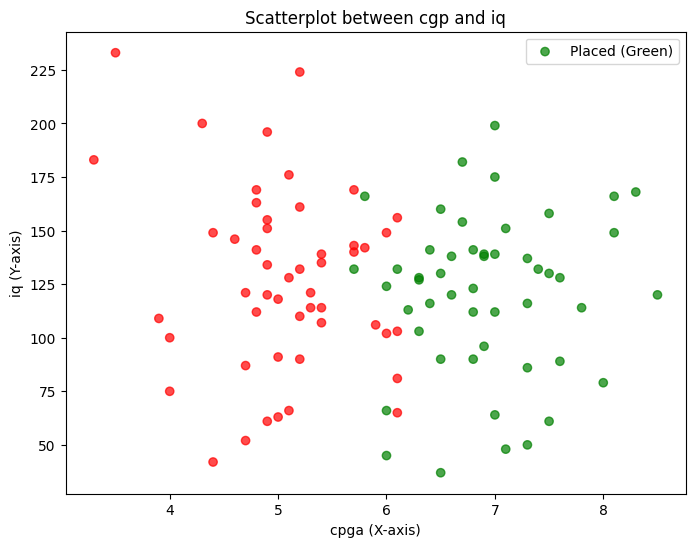

In [42]:
import matplotlib.pyplot as plt

x = df['cgpa']
y = df['iq']
placement_status = df['placement']

# Assign colors based on placement status
colors = placement_status.map({1: 'green', 0: 'red'})
colors
plt.figure(figsize=(8,6))
plt.scatter(x,y,c=colors,alpha=0.7)

# adding labels and titles
plt.title('Scatterplot between cgp and iq')
plt.xlabel('cpga (X-axis)')
plt.ylabel('iq (Y-axis)')
plt.legend(['Placed (Green)', 'Not Placed (Red)'])


# show plot
plt.show()



iloc pandas ka ek indexing method hai jo DataFrame ke rows aur columns ko integer-based indexing se access karta hai. Iska use row aur column positions ke basis par data select karne ke liye hota hai.

1. Ek Row Access Karna:
python
Copy code
# First row fetch karo
print(df.iloc[0])  # Row 0 ka pura data
2. Multiple Rows Access Karna:
python
Copy code
# Rows 0 se 3 tak fetch karo
print(df.iloc[0:3])  # Rows 0, 1, 2
3. Ek Row Aur Ek Column Access Karna:
python
Copy code
# First row ka third column fetch karo
print(df.iloc[0, 2])  # Row 0, Column 2
4. Multiple Rows Aur Columns Access Karna:
python
Copy code
# Rows 0-2 aur Columns 1-3 fetch karo
print(df.iloc[0:3, 1:4])  # Rows 0-2, Columns 1-3
5. Last Row Ya Column Access Karna:
python
Copy code
# Last row fetch karo
print(df.iloc[-1])  # Last row
# Last column fetch karo
print(df.iloc[:, -1])  # Sare rows aur last column
6. Specific Rows Aur Columns Ki List Pass Karna:
python
Copy code
# Rows 1 aur 3, aur Columns 0 aur 2 fetch karo
print(df.iloc[[1, 3], [0, 2]])
7. Sari Rows Ya Columns Select Karna:
python
Copy code
# Sare rows aur first two columns fetch karo
print(df.iloc[:, 0:2])  # All rows, Columns 0 and 1

In [49]:
# X = df.drop('placement',axis=1)
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
y


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

Yeh description ek function ka hai jo Scikit-learn library me available hai, aur iska naam hai train_test_split. Yeh function kaam aata hai data ko train aur test subsets me randomly split karne ke liye, jo machine learning models train aur test karte waqt zarurat hoti hai. Ab samajhte hain isko step-by-step Hinglish me:

Function Signature:
python
Copy code
train_test_split(*arrays: Any, test_size: Float | None = None, train_size: Float | None = None, random_state: Int | RandomState | None = None, shuffle: bool = True, stratify: ArrayLike | None = None) -> list
*arrays: Yeh ek sequence hai jo indexable hote hain, jaise list, numpy array, scipy sparse matrices, ya pandas dataframes.
Matlab, aap ek ya zyada data arrays de sakte ho jo ek hi length ke hone chahiye.
Parameters (Arguments jo pass kar sakte ho):
test_size (float/int, default=None):

Agar float hai, toh 0.0 aur 1.0 ke beech ka proportion hoga jo test data ke liye use hoga.
Example: test_size=0.2 ka matlab hai 20% data test ke liye.
Agar int hai, toh exact number of samples jo test split me chahiye.
Example: test_size=2 ka matlab hai 2 rows test set me jayengi.
Agar None hai, toh yeh automatically train_size ke complement (jo bacha data hai) ke hisaab se set ho jayega.
train_size (float/int, default=None):

Yeh bataata hai train data ka size. Agar None hai, toh yeh automatically test_size ke complement ke hisaab se set ho jata hai.
random_state (int/RandomState/None, default=None):

Yeh shuffling ke liye ek seed value deta hai, taki har baar aapko same split mile (reproducible results).
Example: random_state=42 lagane se shuffling fix ho jati hai.
shuffle (bool, default=True):

Agar True hai, toh data randomly shuffle hoga.
Agar False hai, toh stratify None hona zaruri hai.
stratify (array-like, default=None):

Agar aapka data stratified split (jaise balanced classes) me chahiye, toh yeh argument pass karte hain.
Example: Aapke labels me imbalance hai (class 1 ke 100 aur class 0 ke 10 samples), toh stratify=labels ka use karke train aur test sets me balance maintain karoge.
Returns:
splitting: Ek list deta hai jo train-test split data ko contain karti hai.
Example: Agar X aur y pass kiya hai, toh return hoga:
[X_train, X_test, y_train, y_test].
Examples:
Example 1: Basic Usage
python
Copy code
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)  # Input arrays
print(X)  # Feature matrix
# Output:
# array([[0, 1],
#        [2, 3],
#        [4, 5],
#        [6, 7],
#        [8, 9]])

print(list(y))  # Labels
# Output: [0, 1, 2, 3, 4]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train)
# Output: [[4, 5], [0, 1], [6, 7]]

print(y_train)
# Output: [2, 0, 3]

print(X_test)
# Output: [[2, 3], [8, 9]]

print(y_test)
# Output: [1, 4]
Example 2: Without Shuffle
python
Copy code
train_test_split(y, shuffle=False)
# Output: [[0, 1, 2], [3, 4]]
Core Idea:
Yeh ek helper function hai jo aapke training aur testing sets ko easily aur efficiently banata hai.
Aap shuffle, stratify, aur split size ka control le sakte ho.
Use Case: Jab aap Machine Learning projects me models ko train/test karte ho, toh yeh bahut common tool hai.

In [50]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)


Aap standardization ka use karne ke liye StandardScaler ka use kar sakte ho jo sklearn.preprocessing module ka part hai. Yeh scaler data ko normalize karta hai by subtracting the mean and dividing by the standard deviation. Iska result ek dataset hota hai jisme mean = 0 aur standard deviation = 1 hota hai.

Code for Standardization
python
Copy code
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Optional: Convert back to DataFrame for better visualization
import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Standardized Training Data:\n", X_train_scaled.head())
print("Standardized Testing Data:\n", X_test_scaled.head())
Explanation of Code:
fit_transform(X_train): Pehle scaler ko training data ke mean aur standard deviation ke saath fit karta hai aur training data ko transform karta hai.
transform(X_test): Fit hone ke baad, wahi scaler test data pe lagaya jata hai.
Mean and Standard Deviation:
Mean: 0
Standard deviation: 1 (After transformation)
Pandas DataFrame Conversion: Hum DataFrame me wapas convert karte hain for easy column-based analysis.
Note:
X_train aur X_test ko scale karte waqt ensure karein ki test data pe sirf transform use karein, fit nahi, taaki data leakage na ho.
Aap ab is scaled data ko apne ML models me use kar sakte ho. 

In [52]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Optional: Convert back to DataFrame for better visualization
import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Standardized Training Data:\n", X_train_scaled.head())
print("Standardized Testing Data:\n", X_test_scaled.head())

Standardized Training Data:
        cgpa        iq
0 -1.737185 -0.620298
1  1.455373  0.098062
2 -0.939046 -1.620872
3  0.036458  0.636832
4  1.189327 -0.979479
Standardized Testing Data:
        cgpa        iq
0  1.366691  0.149373
1  2.076148  1.124291
2  0.302505  0.072406
3  0.036458 -1.492593
4  1.366691 -1.620872


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Step 1: Initialize the Logistic Regression model
model = LogisticRegression()

# Step 2: Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Step 3: Predict the target values for the test data
y_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")

# Optional: Print classification report for detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of Logistic Regression: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



In [54]:
import pickle

In [55]:
pickle.dump(model,open('model.pkl','wb'))